<a href="https://colab.research.google.com/github/LotaSchwager/ADA-Informes/blob/main/ShortestPath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe sobre el algoritmo de Bellman-Ford.

## 1. Descripción del problema

### 1.1. El problema del camino más corto de fuente única
En el problema del camino más corta de fuente única, la entrada consiste en un grafo dirigido $G = (V,E)$ con un peso o longitud $l_e$ para cada arco $e ∈ E$ y un origen designado $s ∈ V$ que se denomina nodo fuente o nodo inicial, la **longitud de un camino** es la suma de las longitudes $l_e$ de cada arco $e$ por la cual la ruta pasa.

La responsabilidad del algoritmo es calcular para cada posible destino $v$, la longitud mínima $dist(s,v)$ de un camino dirigido en $G$ desde $s$ hasta a $v$. 

Si el camino de $s$ hasta $v$ no existe, $dist(s.v)$ se definirá como $+∞$.

### 1.2. Ciclos negativos
Hay veces que queremos representar problemas como la compra o venta dentro de unas transacciones financieras. Este problema corresponde de encontrar el camino más corto de un grafo con longitudes positivas y negativas, pero con arcos negativos tendremos que tener cuidado con lo que queremos decir con “distancia de ruta más corta”, ¿Qué pasa en este grafo?.

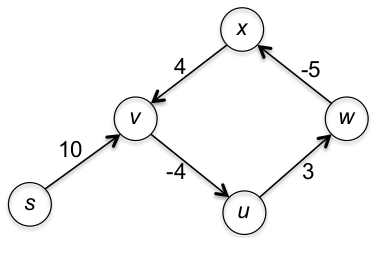

El problema dentro de este grafo es que contiene un ciclo negativo, es decir, un ciclo dirigido en el que la suma de sus arcos es negativo. ¿Qué podríamos querer decir con “camino $s$→$v$ más corto”?.

###Opción 1: permitir los ciclos
La primera opción es permitir que un camino $s$→$v$ incluyan uno o más ciclos. Pero entonces, en presencia de un ciclo negativo, ni siquiera es necesario que exista un camino más corto. Por ejemplo en el grafo anterior hay una ruta $s$→$v$ con longitud de 10, pero si de $v$ te vas de $u$→$w$→$x$→$v$ ahora el camino tendrá valor 8, pero si este ciclo se vuelve a realizar valdrá 6 y así sucesivamente ira disminuyendo el valor de esta ruta.

Por lo tanto, no hay un camino $s$→$v$ más corto y la única definición sensata es $dist(s,v)$ es $-∞$.

###Opción 2: Prohibir ciclos
¿Qué pasa si consideramos solo caminos sin ciclos?. Sin nodos repetidos permitidos, solo tenemos un número finito de caminos. El “camino $s$→$v$ más corto” sería entonces el que tenga la longitud más pequeña. Esta definición opción tiene más sentido, pero tiene un problema sutil que hacer en presencia de un ciclo negativo.

Por lo que juntaremos las dos opciones y trabajamos con base en la opción en la que estaremos.

### 1.3. Problema: Ruta más corta de fuente única (versión revisada)
**Entrada**: Un grafo dirigido $G = (V,E)$, un nodo inicial $s ∈ V$, y longitudes $l_e$ para cada arco $e ∈ E$.

**Salida**: Uno de los siguientes:
+ La distancia del camino más corto $dist(s,v)$ para cada nodo $v ∈ V$.
+ Una declaración de que $G$ contiene un ciclo negativo. 

## 2. Descripción del algoritmo de Bellman-Ford
El algoritmo de Bellman-Ford resuelve el problema del camino más corto de fuente única con grafos que contienen arcos negativos, calculando las distancias correctas del camino más corto o determina correctamente que el grafo de entrada contiene un ciclo negativo. Este algoritmo sigue el paradigma de la programación dinámica.

### 2.1. Los subproblemas del algoritmo
Como siempre con la programación dinámica, el paso más importante es
entender las formas en que se puede construir la solución óptima a partir de subproblemas más pequeños. El algoritmo de Bellman-Ford define $P$ como el camino más corto entre $s$→$v$ que se puede dividir entre el camino más corto $P'$ entre $s$→$w$ ($w$ un nodo que conecta con $v$) más el camino entre $w$→$v$.

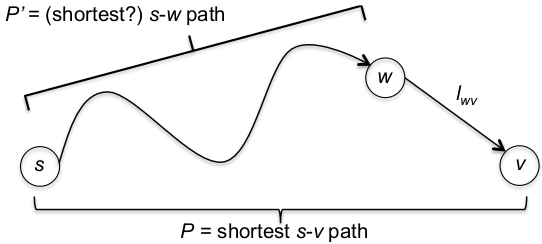

¿En qué sentido el prefijo $P'$ resuelve un “pequeño” subproblema del problema original $P$? Con arcos negativos, la longitud de $P'$ puede que sea más largo que $P$. Lo que si sabemos es que $P'$ contiene menos arcos que $P$ lo que motiva la idea principal de los subproblemas de este algoritmo de Bellmann-Ford y es introducir un parámetro de conteo de saltos $i$ que restringe la cantidad de arcos que usaremos para crear esta ruta más corta, con subproblemas más “grandes” teniendo un largo de arcos $i$, entonces, el prefijo de ruta puede verse como una solución a un subproblema más pequeño.

Por ejemplo, considera este grafo.

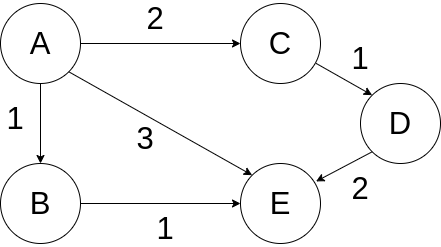

Consideremos que el nodo inicial es el $A$ y el destino es $E$.
+ Cuando el valor de $i$ es 0, no hay ruta de $A$→$E$, por lo que el camino de $A$→$E$ con 0 arcos es de +∞. 
+ Cuando $i$ es 1, tenemos la ruta $A$→$E$ y el valor del subproblema es 3.
+ Cuando $i$ es 2, tenemos la ruta $A$→$B$→$E$ y el valor del subproblema es 2.
+ Cuando $i$ es 3 o más, tenemos la ruta $A$→$C$→$D$→$E$ y el valor del subproblema es 5.

La ruta $A$→$B$→$E$ es la que contiene la longitud más baja de 2 $<$ 3 $<$ 5.

#### Algoritmo Bellman-Ford: Subproblemas
Calcular $L_{i,v}$, la longitud del camino más corto con al menos $i$ arcos de $s$ a $v$ en $G$, con ciclos permitidos. (Si la ruta no existe, se define $L_{i,v}$ como $+∞$).

Para cada $i ∈ [0,1,2,...]$ y cada nodo $v ∈ V$.

### 2.2. Sub estructura óptima del algoritmo
Considere el grafo $G = (V,E)$ con un nodo de origen $s ∈ V$, y solucionar el subproblema que está definido por un nodo destino $v ∈ V$ y la variable $i ∈ [1,2,...]$ que restringirá la cantidad de arcos tomados para solucionar el subproblema, supongamos que $P$ es el camino de $s$→$v$ con a lo más $i$ arcos, y además es el camino más corto.

#### **Caso 1**: $P$ tiene $i - 1$ o menos arcos.
En este caso, la ruta $P$ puede interpretarse inmediatamente como una solución al subproblema más pequeño con $i - 1$ arcos (todavía con destino a $v$). El camino $P$ debe ser una solución óptima para este subproblema más pequeño, si cualquier camino corto $s$→$v$ con al menos $i - 1$ arcos como máximo sería una solución superior al subproblema original, contradice el propósito de optimización de $P$.

Si la ruta P utiliza todos los arcos del grafo, seguimos usando el patrón de varios estudios de casos previos y eliminaremos el último arco de P para obtener una solución a un subproblema más pequeño. Si la ruta P utiliza todos los arcos del grafo, seguimos usando el patrón de varios estudios de casos previos y eliminaremos el último arco de P para obtener una solución a un subproblema más pequeño.

#### **Caso 2**: $P$ tiene $i$ arcos.
Sea $L$ la longitud de $P'$. Sea $P$ los primeros $i - 1$ arcos de $P$, y $(w,v)$ su salto final:

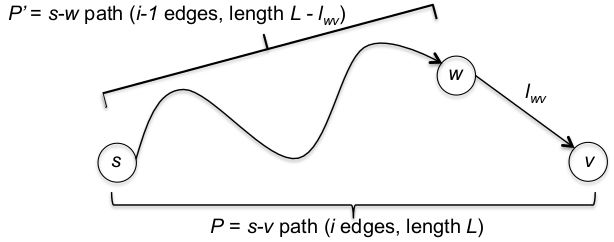

El prefijo $P'$ es un camino $s$→$w$ con como máximo $i-1$ arcos y longitud $L-l_{wv}$. No puede haber un camino más corto: 

Si $P^*$ fuera un camino $s$→ $w$ con $i-1$ arcos como máximo y longitud $L^* < L - l_{wv}$, añadir el arco $(w,v)$ a $P^*$ produciría un camino $s$→$v$ con a lo más $i$ arcos y longitud $L^* + l_{wv} < (L - l_{wv}) + l_{wv} = L$.

Contradiciendo la optimización de P para el subproblema original, porque $P^*$ más el $l_{wv}$ debería tener largo $L$ y no uno supuestamente menor a $L$.

### 2.3. Función de recurrencia
Denotamos el camino minimo de $s$→$v$ con almenos $i$ arcos, ciclos permitidos.(Si no existe dicho camino, denotaremos a $L_{i,v} = +∞).$ Para todo $i ≥ 1$  y $v ∈ V$.

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(caso 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(caso 2)}
    	\end{array}
\right\}$

El $\min$ externo en la recurrencia toma a los dos casos osea que $L_{i,v}$ sera el minimo entre el caso 1 y el caso 2, para el $\min$ perteneciente a la del caso 2 sera el minimo de todos los subproblemas creados a partir de $i$ arcos. Si $L_{i-1,w}$ es $+∞$ significa que para el nodo $s$ en $i$ arcos $v$ es inalcansable, por lo que el valor de recurrencia de $L_{i,v} = +∞$

### 2.4. Ejemplo del algoritmo de Bellman-Ford
Considerando el siguiente grafo:

Queremos ver la longitud más corta entre el nodo inicial $s$ hasta $v$.

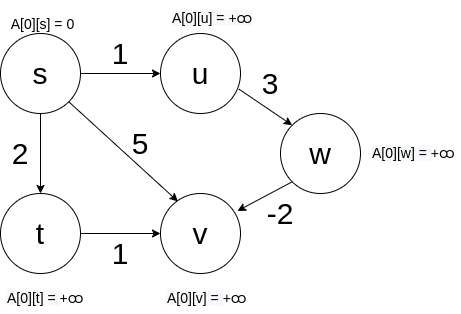

Se empieza con $i = 0$, o sea sin ningún arco, por lo que todos los A se inicializa con $+∞$ excepto el nodo inicial que se inicializa con 0 porque se está apuntado a sí misma.

Con $i = 1$, vemos que hay nodos que se unen con $s$ con 1 arco.
+ $s$→$v$ :: $A[ 1 ][ v ] = 5$.
+ $s$→$t$ :: $A[ 1 ][ t ] = 2$.
+ $s$→$u$ :: $A[ 1 ][ u ] = 1$.

Y el resto se le rellena con $+∞$

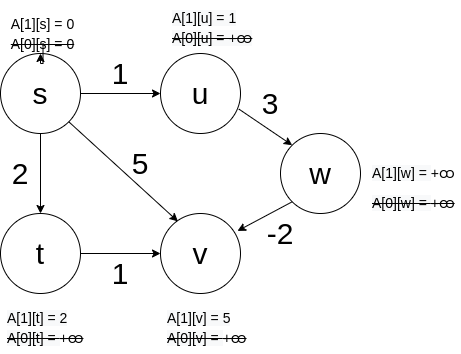

Con $i = 2$, vemos que hay otra ruta para llegar de $s$ a $v$ con 2 arcos:

+ $s$→$t$→$v$ :: ¿$A[ 1 ][ t ]$ $+$ $l_{t,v}$ es menor que $A[ 1 ][ v ]$?, si y por eso ahora $A[ 2 ][ v ] = 3$.
+ $s$→$u$→$w$ :: $A[ 2 ][ w ]$ = 4

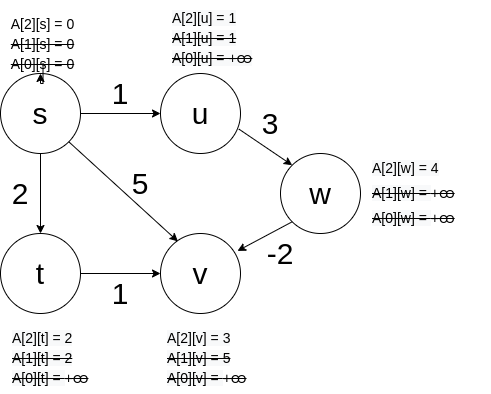

Con $i = 3$ o más tenemos otra nueva ruta para llegar de $s$ hasta $v$:

+ $s$→$u$→$w$→$v$ :: ¿$A[ 2 ][ w ]$ $+$ $l_{w,v}$ es menor que $A[ 2 ][ v ]$?, si y por eso ahora $A[ 3 ][ v ] = 2$.

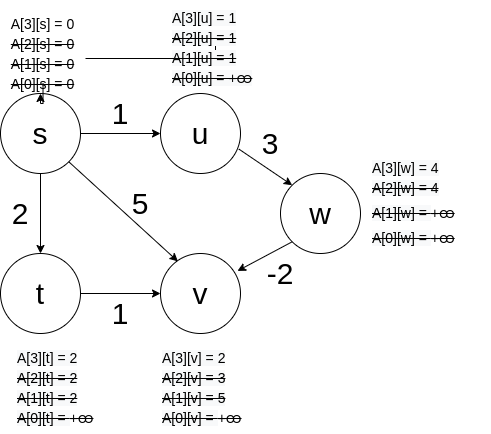

No hay más rutas de $s$ hasta $v$ con $i$ más grandes que 3 por lo que termina el algoritmo con los mismos valores para $i = 6$ (que son la cantidad de arcos que tiene el grafo).

Por lo que el camino más corto de $s$ hasta $v$ es el valor $A[ 3 ][ v ]$ de longitud 2, que es la ruta $s$→$u$→$w$→$v$.

## 2.5. Breve descripción del algoritmo de Dijkstra
El algoritmo de Dijkstra tiene la misma finalidad que el algoritmo de Bellman-Ford, pero con la diferencia esencia que el algoritmo de Dijkstra no funciona con ciclos negativos.

Eso significa que la entrada que recibe es la misma que la del Bellman-Ford, pero tienen que con la cualidad que las longitudes $l_e$ de los arcos $e \in E$ tiene que ser mayor a 0.

Este algoritmo tiene un conjunto $S$ para guardar los nodos ya visitados, y consiste en sumar la longitud de un nodo y todas las posibilidades de nodos que puede llegar y elegir el de menor longitud.

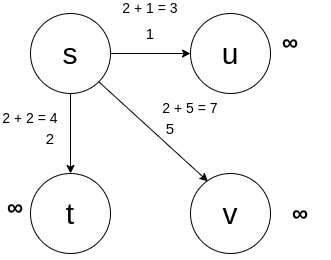

Por ejemplo aquí digamos que el valor que tiene el nodo $s$ es de 2 por lo que el algoritmo calcula la longitud de todas las opciones que se tiene de ir desde $s$ hasta otro nodo, vemos que de todas las longitudes posibles la de $s$→$u$ tiene el menor valor que es 1 por lo que esta es la opción que el algoritmo elige como siguiente ruta.

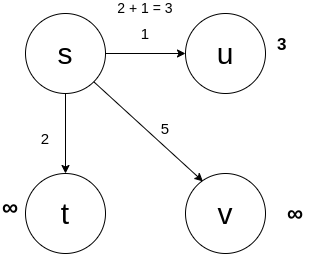

Por eso el resto de nodos seguirán con el mismo valor infinito, pero el nodo elegido como ruta se le actualizara su valor ha obtenido y esta se agregara al conjunto $S$ de nodos visitados.

### 2.6 Ejemplo del algortimo de Dijkstra
Por ejemplo tenemos el siguiente grafo donde nuestro grafo inicial es el $c$:

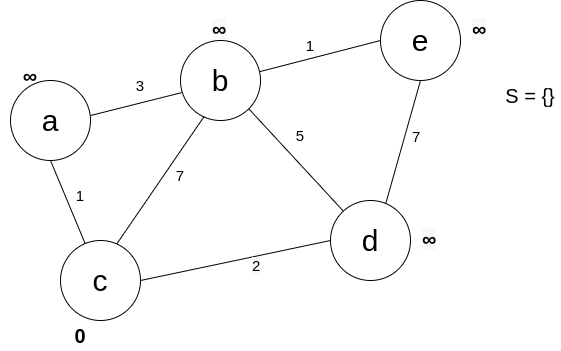

Empezamos desde el nodo de inicio $c$ y lo agregamos al conjunto $S$ de los nodos visitados, después vemos los posibles nodos visitables:

+ $c$→$a$ :: $0 + 1 = 1$
+ $c$→$b$ :: $0 + 7 = 7$
+ $c$→$d$ :: $0 + 2 = 2$

El menor de todos es el $c$→$a$ por lo cual lo elegimos y agregamos el nodo $a$ al conjunto $S$.

Encuanto al resto se guardan los resultados para despues comparar si estos son los menores o no.

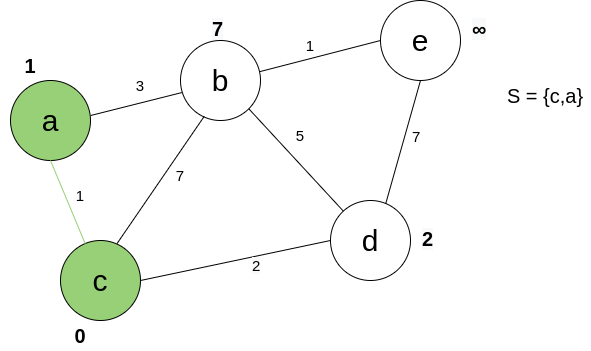

Siguiendo con el algoritmo ahora tenemos las posibilidades de los nodos $c$ y del $a$:

+ $c$→$b$ :: $0 + 7 = 7$
+ $c$→$d$ :: $0 + 2 = 2$
+ $a$→$b$ :: $1 + 3 = 4$

El menor es del $c$→$d$ que es igual a 2 agregando el nodo $d$ a los nodos visitados y se actualiza los valores menores del resto de comparaciones siempre guardando la menor longitud.

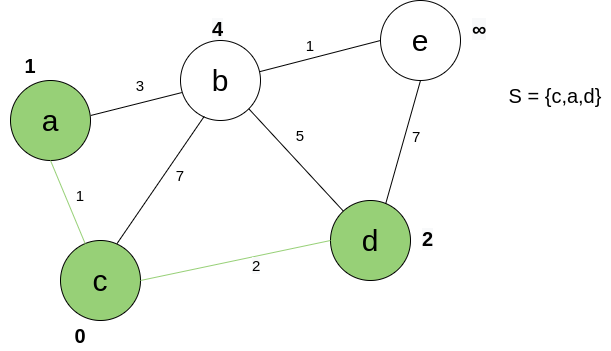

Siguiendo con el algoritmo ahora tenemos las posibilidades del nodos $c$, $a$ y $d$:

+ $c$→$b$ :: $0 + 7 = 7$
+ $a$→$b$ :: $1 + 3 = 4$
+ $d$→$e$ :: $2 + 7 = 9$

El menor es del $a$→$b$ que es igual a 4, el mismo valor que ya teníamos de las comparaciones anteriormente, por lo que añadimos el nodo $b$ a los nodos visitados y actualizamos las comparaciones de los nodos no visitados.

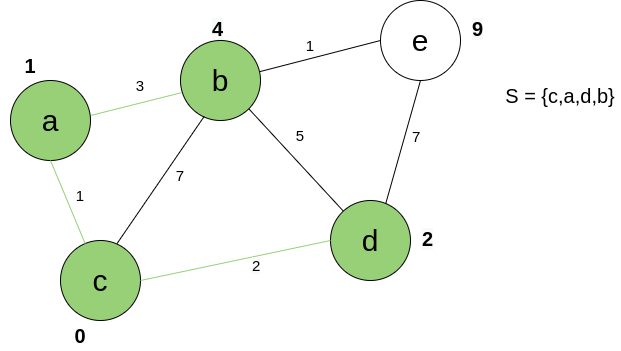

Por último ahora tenemos las posibilidades de los nodos $b$ y $d$:

+ $b$→$e$ :: $4 + 1 = 5$
+ $d$→$e$ :: $2 + 7 = 9$

El menor de las 2 opciones es la del $b$→$e$ de longitud 5, agregamos $e$ a $S$, finalizando el algoritmo debido a que ya visitamos todos los nodos del grafo.

Finalmente, tenemos la siguiente ruta, que representa la ruta más corta desde $c$ hacia cada nodo del grafo.

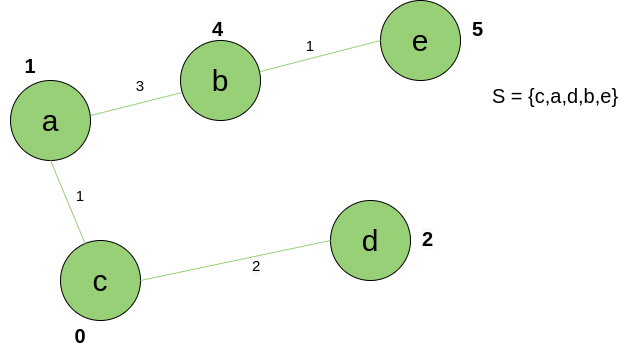

## 3. Implementacion en python

In [2]:
def bellman_ford(graph, source):
    # Step 1: Prepare the distance and predecessor for each node
    distance, predecessor = dict(), dict()
    for node in graph:
        distance[node], predecessor[node] = float('inf'), None
    distance[source] = 0

    # Step 2: Relax the edges
    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbour in graph[node]:
                # If the distance between the node and the neighbour is lower than the current, store it
                if distance[neighbour] > distance[node] + graph[node][neighbour]:
                    distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node

    # Step 3: Check for negative weight cycles
    for node in graph:
        for neighbour in graph[node]:
            assert distance[neighbour] <= distance[node] + graph[node][neighbour], "Negative weight cycle."
 
    return distance, predecessor

graph = {
        'a': {'b': -1, 'c':  4},
        'b': {'c':  3, 'd':  2, 'e':  2},
        'c': {},
        'd': {'b':  -1, 'c': -5},
        'e': {'d': -3}
}

distance, predecessor = bellman_ford(graph, source='a')
print(distance)
print(predecessor)    

AssertionError: ignored